In [1]:
import math
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt

pandas.options.display.max_columns = None
pandas.options.display.max_rows = None
pandas.options.display.max_colwidth = None
seaborn.set(rc={"figure.figsize":(7,7)})

drop = ["StartDate", "EndDate", "Status", "IPAddress", "Progress", "Duration (in seconds)", "RecordedDate", "ResponseId", "RecipientLastName", "RecipientFirstName", "RecipientEmail", "ExternalReference", "LocationLatitude", "LocationLongitude", "DistributionChannel", "Finished", "UserLanguage"]

# final LANEY survey after Laney semester (December 2022)
laney1 = pandas.read_csv("csv/laney_dec.csv").drop(columns=drop) # removing unneeded columns listed above
laney1 = laney1.drop(0) # removing unneeded second row of import IDs
laney1 = laney1.drop(1) # removing unneeded first row of questions

def get_responses(df, column):
    
    results = {
        "valid": 0,
        "di": 0,
        "sd": 0,
        "n": 0,
        "sa": 0,
        "ag": 0,
    }
    
    results_2 = {
        "valid": 0,
        "n": 0,
        "r": 0,
        "s": 0,
        "v": 0,
        "a": 0
    }
    
    if "Programming" in column and "." in column:
        
        for index, row in df.iterrows():

            if isinstance(row[column], str): 
                results_2["valid"] += 1

            if row[column] == "Never":
                results_2["n"] += 1
            elif row[column] == "Rarely":
                results_2["r"] += 1
            elif row[column] == "Sometimes":
                results_2["s"] += 1
            elif row[column] == "Very Often":
                results_2["v"] += 1
            elif row[column] == "Always":
                results_2["a"] += 1

        return results_2
        
    for index, row in df.iterrows():

        if isinstance(row[column], str): 
            results["valid"] += 1

        if row[column] == "Strongly Disagree":
            results["di"] += 1
        elif row[column] == "Somewhat Disagree":
            results["sd"] += 1
        elif row[column] == "Unsure or Undecided":
            results["n"] += 1
        elif row[column] == "Somewhat Agree":
            results["sa"] += 1
        elif row[column] == "Strongly Agree":
            results["ag"] += 1
        elif row[column] == "Unsure or Undecided":
            results["u"] += 1

    return results

def multi_response(df, columns):
    
    results = {}
    
    for col in columns:
        results[col] = get_responses(df, col)
        
    return results

def total_multi(obj):
    
    results = {
        "valid": 0,
        "pos": 0,
        "pos_with_n": 0
    }

    for key in obj:

        results["valid"] += obj[key]["valid"]

        if "di" in list(obj[key].keys()):

            results["pos"] += obj[key]["sa"] + obj[key]["ag"]
            results["pos_with_n"] += obj[key]["n"]

        elif "r" in list(obj[key].keys()):

            results["pos"] += obj[key]["s"] + obj[key]["v"] + obj[key]["a"]

        else:

            results["pos"] += obj[key]["s"] + obj[key]["f"] + obj[key]["v"]

    results["pos_with_n"] += results["pos"]

    return results

To start I am calculating the total number of Laney program graduates. In relation to the number of program graduates, we will also address learner demographics and program retention rates. Admissions information is being based off of the information found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1uUlbF7_7PhXRIEFY5fRmXEGdRyiXGJmF-FTBfR1UhH0/edit?usp=sharing) and demographic information comes from [this spreadsheet](https://docs.google.com/spreadsheets/d/1atztYmxm239wJqQiIN7XOCVAo1YHFHBCpSZjLXRVLWc/edit?usp=sharing).

<hr style="border:2px solid black">

<b>First we will be examining all the learners responses to get a sense of our program's overall impact in various areas.</b> Learners responded to questions which assessed their technical skills, based on their ability to communicate about technology and perform general programming task. Our questions then assessed their values towards using tech for good, their sense of community within the program, and knowledge gained about career opportunities in tech. Finally, we inquire about their intersectional tech identity, how much they feel like they belong in tech and can be successful in the field.

<b>It is important to note that the number of survey responses differs from the number of verified program graduates. Among those responses, not every survey participant answered every question.</b>

In this evaluation, <b>"positive responses"</b> is referring to the response choices of <b>"Sometimes", "Very often", "Always", "Somewhat agree",</b> and <b>"Strongly agree".</b>

In [2]:
# combine Communication, Programming & Python

laney = multi_response(laney1, ["QID1_1", "QID1_2", "Programming Skills_1", "Programming Skills_2", "Programming Skills_3", "Programming Skills_1.1", "Programming Skills_2.1"])

laney_totals = total_multi(laney)

laney, laney_totals

({'QID1_1': {'valid': 14, 'di': 0, 'sd': 0, 'n': 2, 'sa': 3, 'ag': 9},
  'QID1_2': {'valid': 14, 'di': 0, 'sd': 0, 'n': 2, 'sa': 3, 'ag': 9},
  'Programming Skills_1': {'valid': 14,
   'di': 0,
   'sd': 0,
   'n': 1,
   'sa': 5,
   'ag': 8},
  'Programming Skills_2': {'valid': 14,
   'di': 0,
   'sd': 1,
   'n': 1,
   'sa': 3,
   'ag': 9},
  'Programming Skills_3': {'valid': 14,
   'di': 0,
   'sd': 1,
   'n': 2,
   'sa': 4,
   'ag': 7},
  'Programming Skills_1.1': {'valid': 14,
   'n': 2,
   'r': 0,
   's': 2,
   'v': 6,
   'a': 4},
  'Programming Skills_2.1': {'valid': 14,
   'n': 2,
   'r': 1,
   's': 4,
   'v': 2,
   'a': 5}},
 {'valid': 98, 'pos': 83, 'pos_with_n': 91})

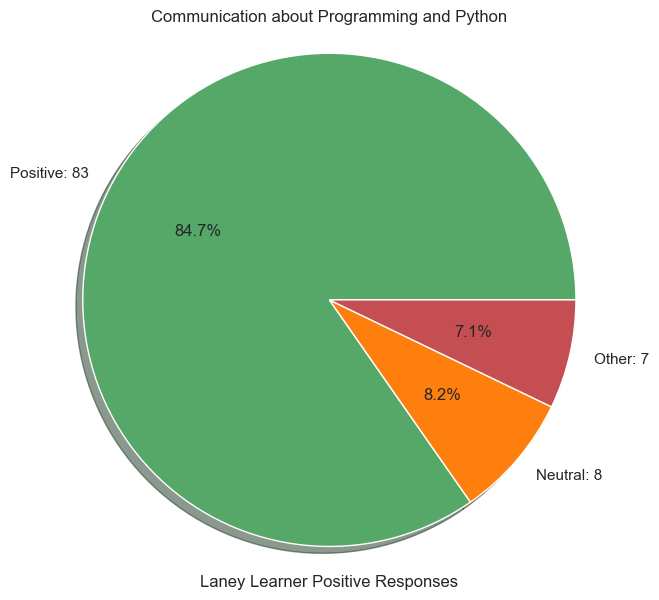

In [3]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(laney_totals["pos"]), 'Neutral: {}'.format(laney_totals["pos_with_n"] - laney_totals["pos"]), 'Other: {}'.format(laney_totals["valid"] - laney_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (laney_totals["pos"] / laney_totals["valid"]) * 100
per2 = ((laney_totals["pos_with_n"] - laney_totals["pos"]) / laney_totals["valid"]) * 100
per3 = 100 - per - per2

size_of_groups = [per, per2, per3]

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["g", "tab:orange", "r"], labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("Laney Learner Positive Responses")
plt.title("Communication about Programming and Python")
# plt.savefig('images/laney_comm_about_tech_pie.png')
plt.show()

<b>Overall, there were 98 learner responses to the Communication about Programming and Python section of the survey. 83 (84.7%) were positive not including neutral responses. 91 (92.9%) were positive including neutral responses.</b>

In [4]:
# combine, HtH values, Social justice and community, HtH community & belongingness, Goals, Career

laney = multi_response(laney1, ["SJ & Community_1", "Community_1", "Community_2", "Community_3", "Community_4", "Community_5", "Community_1.1", "Community_2.1", "Community_3.1", "Community_4.1", "Community_5.1", "Goals_1", "Career Opportunities_1", "Career Opportunities_2", "Career Opportunities_3"])

laney_totals = total_multi(laney)

laney, laney_totals

({'SJ & Community_1': {'valid': 12,
   'di': 0,
   'sd': 0,
   'n': 0,
   'sa': 2,
   'ag': 10},
  'Community_1': {'valid': 12, 'di': 0, 'sd': 0, 'n': 1, 'sa': 5, 'ag': 6},
  'Community_2': {'valid': 12, 'di': 0, 'sd': 0, 'n': 1, 'sa': 2, 'ag': 9},
  'Community_3': {'valid': 12, 'di': 0, 'sd': 1, 'n': 1, 'sa': 3, 'ag': 7},
  'Community_4': {'valid': 12, 'di': 2, 'sd': 1, 'n': 2, 'sa': 2, 'ag': 5},
  'Community_5': {'valid': 12, 'di': 0, 'sd': 0, 'n': 1, 'sa': 4, 'ag': 7},
  'Community_1.1': {'valid': 12, 'di': 0, 'sd': 0, 'n': 2, 'sa': 3, 'ag': 7},
  'Community_2.1': {'valid': 12, 'di': 0, 'sd': 1, 'n': 1, 'sa': 4, 'ag': 6},
  'Community_3.1': {'valid': 12, 'di': 0, 'sd': 0, 'n': 0, 'sa': 4, 'ag': 8},
  'Community_4.1': {'valid': 12, 'di': 1, 'sd': 0, 'n': 3, 'sa': 0, 'ag': 8},
  'Community_5.1': {'valid': 12, 'di': 1, 'sd': 0, 'n': 1, 'sa': 0, 'ag': 10},
  'Goals_1': {'valid': 12, 'di': 1, 'sd': 0, 'n': 0, 'sa': 4, 'ag': 7},
  'Career Opportunities_1': {'valid': 12,
   'di': 1,
   'sd

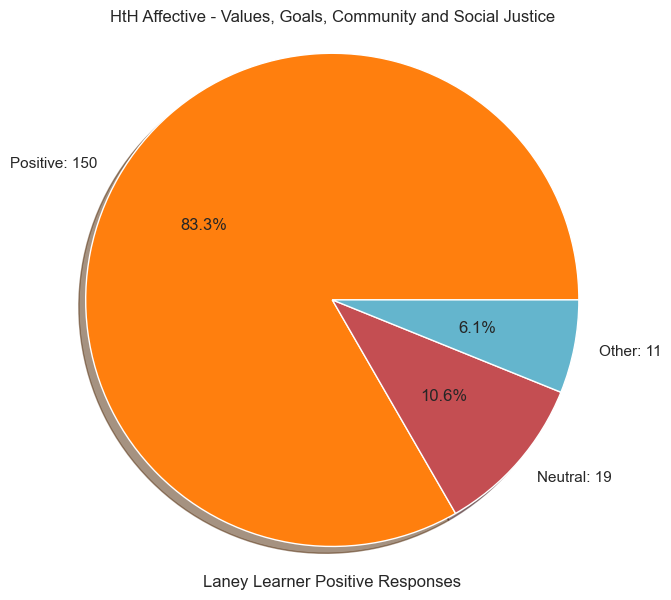

In [5]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(laney_totals["pos"]), 'Neutral: {}'.format(laney_totals["pos_with_n"] - laney_totals["pos"]), 'Other: {}'.format(laney_totals["valid"] - laney_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (laney_totals["pos"] / laney_totals["valid"]) * 100
per2 = ((laney_totals["pos_with_n"] - laney_totals["pos"]) / laney_totals["valid"]) * 100
per3 = 100 - per - per2

size_of_groups = [per, per2, per3]

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["tab:orange", "r", "c"], labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("Laney Learner Positive Responses")
plt.title("HtH Affective - Values, Goals, Community and Social Justice")
# plt.savefig('images/laney_affective_pie.png')
plt.show()

<b>Overall, there were 180 learner responses to the HtH Affective section of the survey. 150 (83.3%) were positive not including neutral responses. 169 (93.9%) were positive including neutral responses.</b>

In [6]:
# intersectional tech identity

laney = multi_response(laney1, ["Gee_1", "Gee_2", "Gee_3", "McAlpine_1", "McAlpine_2", "McAlpine_3", "McAlpine_4", "McAlpine_5"])

laney_totals = total_multi(laney)

laney, laney_totals

({'Gee_1': {'valid': 12, 'di': 0, 'sd': 0, 'n': 1, 'sa': 2, 'ag': 9},
  'Gee_2': {'valid': 12, 'di': 0, 'sd': 0, 'n': 1, 'sa': 1, 'ag': 10},
  'Gee_3': {'valid': 12, 'di': 0, 'sd': 0, 'n': 2, 'sa': 1, 'ag': 9},
  'McAlpine_1': {'valid': 12, 'di': 0, 'sd': 0, 'n': 1, 'sa': 3, 'ag': 8},
  'McAlpine_2': {'valid': 12, 'di': 0, 'sd': 0, 'n': 2, 'sa': 2, 'ag': 8},
  'McAlpine_3': {'valid': 12, 'di': 0, 'sd': 0, 'n': 1, 'sa': 3, 'ag': 8},
  'McAlpine_4': {'valid': 12, 'di': 0, 'sd': 0, 'n': 1, 'sa': 4, 'ag': 7},
  'McAlpine_5': {'valid': 12, 'di': 0, 'sd': 0, 'n': 1, 'sa': 2, 'ag': 9}},
 {'valid': 96, 'pos': 86, 'pos_with_n': 96})

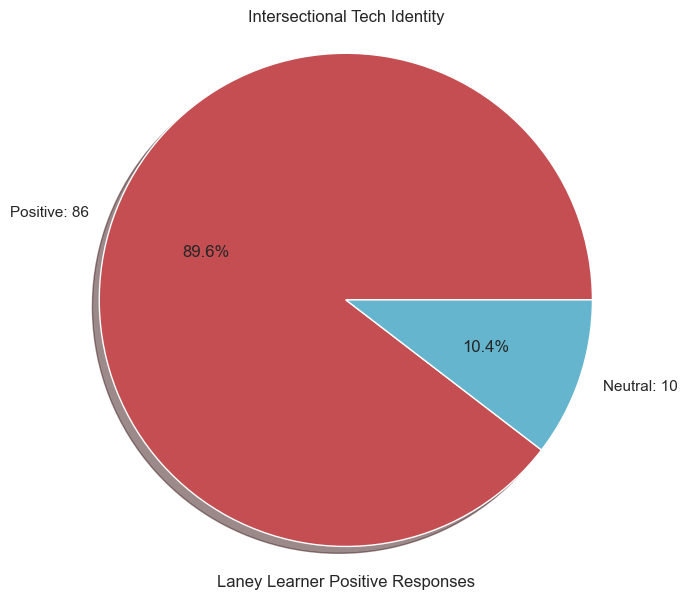

In [7]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(laney_totals["pos"]), 'Neutral: {}'.format(laney_totals["pos_with_n"] - laney_totals["pos"])]

# creating percantages from data for visuals
per = (laney_totals["pos"] / laney_totals["valid"]) * 100
per2 = ((laney_totals["pos_with_n"] - laney_totals["pos"]) / laney_totals["valid"]) * 100

size_of_groups = [per, per2]

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["r", "c"], labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("Laney Learner Positive Responses")
plt.title("Intersectional Tech Identity")
# plt.savefig('images/laney_identity_pie.png')
plt.show()

<b>Overall, there were 96 learner responses to the Intersectional Tech Identity section of the survey. 86 (89.6%) were positive not including neutral responses. All were positive including neutral responses.</b>

<hr style="border:2px solid black">
    
<b>Next we will be examining the learners responses to our inquiries about their ability to communicate about technology.</b> These questions are marked as the <b>QID1_1</b> and the <b>QID1_2</b> columns within the dataframe. Learners had five choices to choose from as their response to these questions: <b>Strongly Disagree, Somewhat Disagree, Somewhat Disagree, Strongly Agree</b>, and <b>Unsure or Undecided.</b> 

<img src="images/laney_comm_just_tech.png" height=100% width=100%>

In [8]:
laney = multi_response(laney1, ["QID1_1", "QID1_2"])

laney_totals = total_multi(laney)

laney, laney_totals

({'QID1_1': {'valid': 14, 'di': 0, 'sd': 0, 'n': 2, 'sa': 3, 'ag': 9},
  'QID1_2': {'valid': 14, 'di': 0, 'sd': 0, 'n': 2, 'sa': 3, 'ag': 9}},
 {'valid': 28, 'pos': 24, 'pos_with_n': 28})

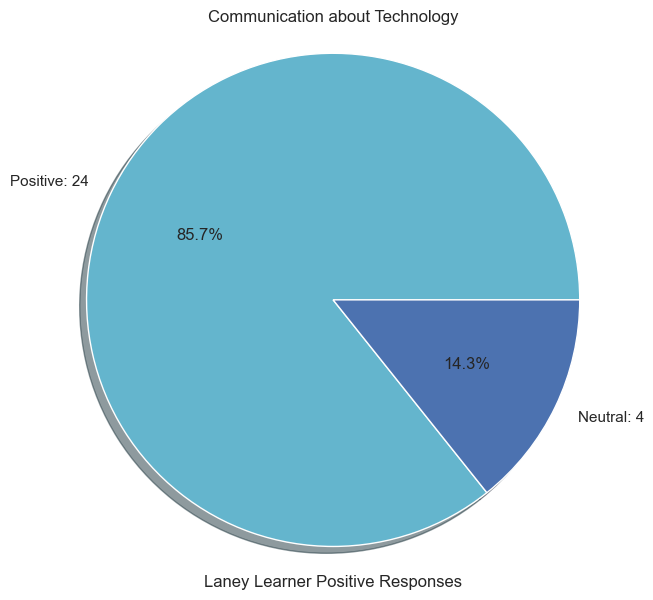

In [9]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(laney_totals["pos"]), 'Neutral: {}'.format(laney_totals["pos_with_n"] - laney_totals["pos"])]

# creating percantages from data for visuals
per = (laney_totals["pos"] / laney_totals["valid"]) * 100
per2 = ((laney_totals["pos_with_n"] - laney_totals["pos"]) / laney_totals["valid"]) * 100

size_of_groups = [per, per2]

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["c", "b"], labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("Laney Learner Positive Responses")
plt.title("Communication about Technology")
# plt.savefig('images/laney_comm_just_tech_pie.png')
plt.show()

<b>Overall, there were 28 responses given from all learners. Of those responses, All were positive including neutral responses and 24 (85.7%) were positive not including neutral responses.</b>

# After a semester at Laney, I can communicate verbally or in writing to others about technology or programming.

In [10]:
get_responses(laney1, "QID1_1")

{'valid': 14, 'di': 0, 'sd': 0, 'n': 2, 'sa': 3, 'ag': 9}

<img src="images/laney_qid1_table.png" height=100% width=100%>

# After a semester at Laney, I can give a short talk to an audience about technology or programming.

In [11]:
get_responses(laney1, "QID1_2")

{'valid': 14, 'di': 0, 'sd': 0, 'n': 2, 'sa': 3, 'ag': 9}

<img src="images/laney_qid2_table.png" height=100% width=100%>

<hr style="border:2px solid black">
    
<b>Next we will be examining the learners responses to our inquiries about their general programming and computer science skills.</b> These questions are marked as the <b>Programming Skills_1, Programming Skills_2, Programming Skills_3, Programming Skills_1.1,</b> and the <b>Programming Skills_2.1</b> columns within the dataframe. Learners had five choices to choose from as their response to these questions. For the first three, those choices were <b>Strongly Disagree, Somewhat Disagree, Somewhat Disagree, Strongly Agree</b>, and <b>Unsure or undecided.</b> For the last two, the choices were <b>Never, Rarely, Sometimes, Very often</b>, and <b>Always.</b>

<img src="images/laney_gen_cs.png" height=100% width=100%>
<img src="images/laney_gen_cs2.png" height=100% width=100%>

In [12]:
laney = multi_response(laney1, ["Programming Skills_1", "Programming Skills_2", "Programming Skills_3", "Programming Skills_1.1", "Programming Skills_2.1"])

laney_totals = total_multi(laney)

laney, laney_totals

({'Programming Skills_1': {'valid': 14,
   'di': 0,
   'sd': 0,
   'n': 1,
   'sa': 5,
   'ag': 8},
  'Programming Skills_2': {'valid': 14,
   'di': 0,
   'sd': 1,
   'n': 1,
   'sa': 3,
   'ag': 9},
  'Programming Skills_3': {'valid': 14,
   'di': 0,
   'sd': 1,
   'n': 2,
   'sa': 4,
   'ag': 7},
  'Programming Skills_1.1': {'valid': 14,
   'n': 2,
   'r': 0,
   's': 2,
   'v': 6,
   'a': 4},
  'Programming Skills_2.1': {'valid': 14,
   'n': 2,
   'r': 1,
   's': 4,
   'v': 2,
   'a': 5}},
 {'valid': 70, 'pos': 59, 'pos_with_n': 63})

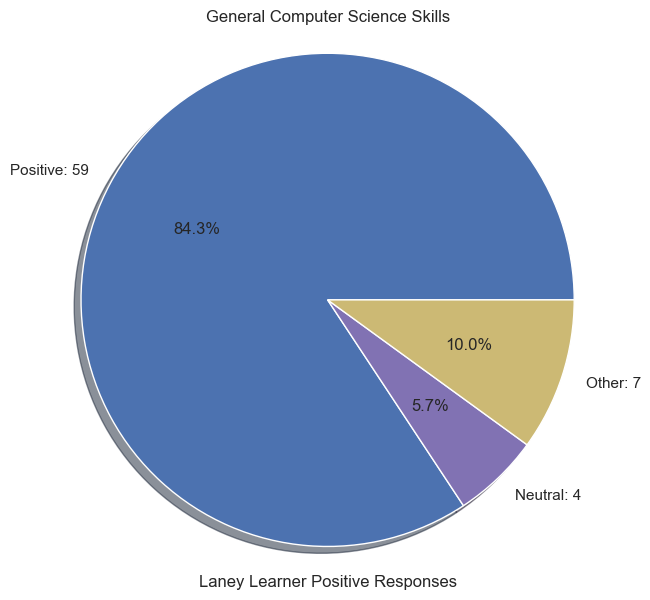

In [13]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(laney_totals["pos"]), 'Neutral: {}'.format(laney_totals["pos_with_n"] - laney_totals["pos"]), 'Other: {}'.format(laney_totals["valid"] - laney_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (laney_totals["pos"] / laney_totals["valid"]) * 100
per2 = ((laney_totals["pos_with_n"] - laney_totals["pos"]) / laney_totals["valid"]) * 100
per3 = 100 - per - per2

size_of_groups = [per, per2, per3]

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["b", "m", "y"], labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("Laney Learner Positive Responses")
plt.title("General Computer Science Skills")
# plt.savefig('images/laney_gen_cs_pie.png')
plt.show()

<b>Overall, there were 70 responses given from all learners. Of those responses, 63 (90%) were positive including neutral responses and 59 (84.3%) were positive not including neutral responses.</b>

# After a semester at Laney, I can write code to complete a simple task

In [14]:
get_responses(laney1, "Programming Skills_1")

{'valid': 14, 'di': 0, 'sd': 0, 'n': 1, 'sa': 5, 'ag': 8}

<img src="images/laney_program1_table.png" height=100% width=100%>

# After a semester at Laney, I increased my programming skills in this program.

In [15]:
get_responses(laney1, "Programming Skills_2")

{'valid': 14, 'di': 0, 'sd': 1, 'n': 1, 'sa': 3, 'ag': 9}

<img src="images/laney_program2_table.png" height=100% width=100%>

# After a semester at Laney, I can explain or storyboard a software idea that I have.

In [16]:
get_responses(laney1, "Programming Skills_3")

{'valid': 14, 'di': 0, 'sd': 1, 'n': 2, 'sa': 4, 'ag': 7}

<img src="images/laney_program3_table.png" height=100% width=100%>

# After a semester at Laney, when I have errors in my code, I know a few things to look for

In [17]:
get_responses(laney1, "Programming Skills_1.1")

{'valid': 14, 'n': 2, 'r': 0, 's': 2, 'v': 6, 'a': 4}

<img src="images/laney_program4_table.png" height=100% width=100%>

# After a semester at Laney, when I write new code, I leave myself enough comments and notes to know what I did.

In [18]:
get_responses(laney1, "Programming Skills_2.1")

{'valid': 14, 'n': 2, 'r': 1, 's': 4, 'v': 2, 'a': 5}

<img src="images/laney_program5_table.png" height=100% width=100%>

<hr style="border:2px solid black">

<b>Next we will be examining the learners responses to our question about if they believe that tech can help improve their own communities.</b> This question is marked as the <b>SJ & Community_1</b> column within the dataframe. Learners had five choices to choose from as their response to this question: <b>Strongly Disagree, Somewhat Disagree, Somewhat Disagree, Strongly Agree</b>, and <b>Unsure or undecided.</b>

<img src="images/laney_sjcomm.png" height=100% width=100%>

In [19]:
laney = multi_response(laney1, ["SJ & Community_1"])

laney_totals = total_multi(laney)

laney, laney_totals

({'SJ & Community_1': {'valid': 12,
   'di': 0,
   'sd': 0,
   'n': 0,
   'sa': 2,
   'ag': 10}},
 {'valid': 12, 'pos': 12, 'pos_with_n': 12})

<b> As you can see from the visual above, there were no negative or neutral responses to this question. As such, no pie chart will follow, since 100% of responses were positive.</b>

<img src="images/laney_sjcomm_table.png" height=100% width=100%>

<hr style="border:2px solid black">
    
<b>Next we will be examining the learners responses to our inquiries about their sense of community and belonging while participating in our programs.</b> These questions are marked as the <b>Community_1, Community_2, Community_3, Community_4</b> and <b>Community_5</b> columns within the dataframe. Learners had five choices to choose from as their response to these questions: <b>Strongly Disagree, Somewhat Disagree, Somewhat Disagree, Strongly Agree</b>, and <b>Unsure or undecided.</b>

<img src="images/laney_comm.png" height=100% width=100%>

In [20]:
laney = multi_response(laney1, ["Community_1", "Community_2", "Community_3", "Community_4", "Community_5"])

laney_totals = total_multi(laney)

laney, laney_totals

({'Community_1': {'valid': 12, 'di': 0, 'sd': 0, 'n': 1, 'sa': 5, 'ag': 6},
  'Community_2': {'valid': 12, 'di': 0, 'sd': 0, 'n': 1, 'sa': 2, 'ag': 9},
  'Community_3': {'valid': 12, 'di': 0, 'sd': 1, 'n': 1, 'sa': 3, 'ag': 7},
  'Community_4': {'valid': 12, 'di': 2, 'sd': 1, 'n': 2, 'sa': 2, 'ag': 5},
  'Community_5': {'valid': 12, 'di': 0, 'sd': 0, 'n': 1, 'sa': 4, 'ag': 7}},
 {'valid': 60, 'pos': 50, 'pos_with_n': 56})

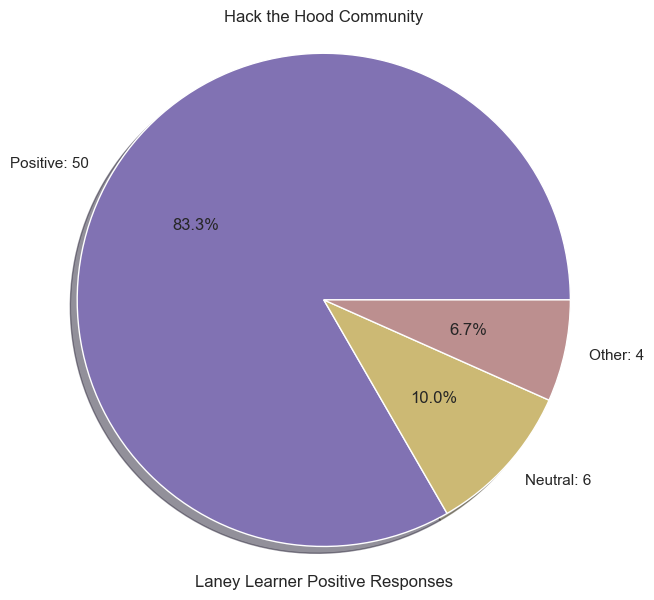

In [21]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(laney_totals["pos"]), 'Neutral: {}'.format(laney_totals["pos_with_n"] - laney_totals["pos"]), 'Other: {}'.format(laney_totals["valid"] - laney_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (laney_totals["pos"] / laney_totals["valid"]) * 100
per2 = ((laney_totals["pos_with_n"] - laney_totals["pos"]) / laney_totals["valid"]) * 100
per3 = 100 - per - per2

size_of_groups = [per, per2, per3]

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["m", "y", "rosybrown"], labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("Laney Learner Positive Responses")
plt.title("Hack the Hood Community")
# plt.savefig('images/laney_comm_pie.png')
plt.show()

<b>Overall, there were 36 responses given from all learners. 35 (97.2%) were positive including neutral responses and 34 (94.4%) were positive not including neutral responses.</b>

# I built relationships with other participants in my program

In [22]:
get_responses(laney1, "Community_1")

{'valid': 12, 'di': 0, 'sd': 0, 'n': 1, 'sa': 5, 'ag': 6}

<img src="images/laney_comm1_table.png" height=100% width=100%>

# I feel the Hack the Hood staff members supported my success.

In [23]:
get_responses(laney1, "Community_2")

{'valid': 12, 'di': 0, 'sd': 0, 'n': 1, 'sa': 2, 'ag': 9}

<img src="images/laney_comm2_table.png" height=100% width=100%>

# The volunteers and panelists provided good advice during the program.

In [24]:
get_responses(laney1, "Community_3")

{'valid': 12, 'di': 0, 'sd': 1, 'n': 1, 'sa': 3, 'ag': 7}

<img src="images/laney_comm3_table.png" height=100% width=100%>

# I had a chance to meet a mentor or role model in technology during this program.

In [25]:
get_responses(laney1, "Community_4")

{'valid': 12, 'di': 2, 'sd': 1, 'n': 2, 'sa': 2, 'ag': 5}

<img src="images/laney_comm4_table.png" height=100% width=100%>

# The volunteers and panelists in the workshops (i.e., ThredUp visit, professional development workshops) provided good advice and information during the program.

In [26]:
get_responses(laney1, "Community_5")

{'valid': 12, 'di': 0, 'sd': 0, 'n': 1, 'sa': 4, 'ag': 7}

<img src="images/laney_comm5_table.png" height=100% width=100%>

<hr style="border:2px solid black">
    
<b>Next we will be examining the learners responses to our inquiries about their sense of community and belonging while enrolled as students at Laney Community College.</b> These questions are marked as the <b>Community_1.1, Community_2.1, Community_3.1, Community_4.1</b> and <b>Community_5.1</b> columns within the dataframe. Learners had five choices to choose from as their response to these questions: <b>Strongly Disagree, Somewhat Disagree, Somewhat Disagree, Strongly Agree</b>, and <b>Unsure or undecided.</b>

<img src="images/laney_lcomm.png" height=100% width=100%>

In [27]:
laney = multi_response(laney1, ["Community_1.1", "Community_2.1", "Community_3.1", "Community_4.1", "Community_5.1"])

laney_totals = total_multi(laney)

laney, laney_totals

({'Community_1.1': {'valid': 12, 'di': 0, 'sd': 0, 'n': 2, 'sa': 3, 'ag': 7},
  'Community_2.1': {'valid': 12, 'di': 0, 'sd': 1, 'n': 1, 'sa': 4, 'ag': 6},
  'Community_3.1': {'valid': 12, 'di': 0, 'sd': 0, 'n': 0, 'sa': 4, 'ag': 8},
  'Community_4.1': {'valid': 12, 'di': 1, 'sd': 0, 'n': 3, 'sa': 0, 'ag': 8},
  'Community_5.1': {'valid': 12, 'di': 1, 'sd': 0, 'n': 1, 'sa': 0, 'ag': 10}},
 {'valid': 60, 'pos': 50, 'pos_with_n': 57})

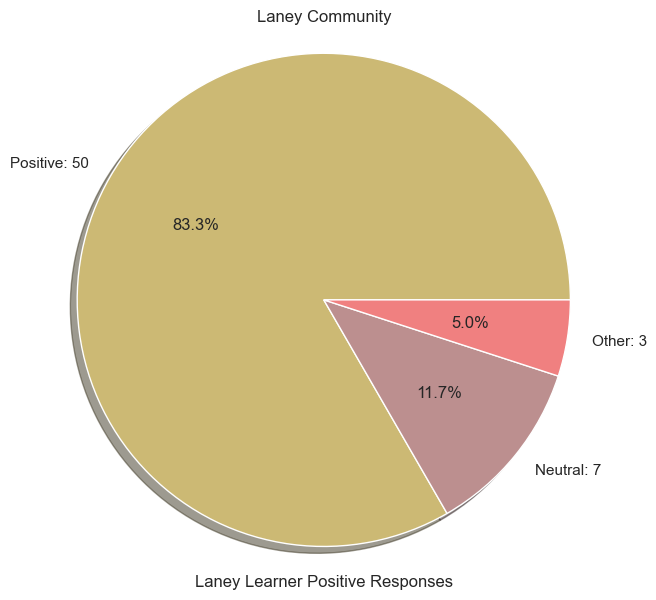

In [28]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(laney_totals["pos"]), 'Neutral: {}'.format(laney_totals["pos_with_n"] - laney_totals["pos"]), 'Other: {}'.format(laney_totals["valid"] - laney_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (laney_totals["pos"] / laney_totals["valid"]) * 100
per2 = ((laney_totals["pos_with_n"] - laney_totals["pos"]) / laney_totals["valid"]) * 100
per3 = 100 - per - per2

size_of_groups = [per, per2, per3]

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["y", "rosybrown", "lightcoral"], labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("Laney Learner Positive Responses")
plt.title("Laney Community")
# plt.savefig('images/laney_lcomm_pie.png')
plt.show()

<b>Overall, there were 60 responses given from all learners. 57 (95%) were positive including neutral responses and 50 (83.3%) were positive not including neutral responses.</b>

# I feel the Laney counselors (Douglass and Terrance) support my success.

In [29]:
get_responses(laney1, "Community_1.1")

{'valid': 12, 'di': 0, 'sd': 0, 'n': 2, 'sa': 3, 'ag': 7}

<img src="images/laney_lcomm1_table.png" height=100% width=100%>

# I feel confident about navigating the resources Laney Community College offers, such as the career counseling center, the school library, etc.

In [30]:
get_responses(laney1, "Community_2.1")

{'valid': 12, 'di': 0, 'sd': 1, 'n': 1, 'sa': 4, 'ag': 6}

<img src="images/laney_lcomm2_table.png" height=100% width=100%>

# I feel confident about navigating the steps needed to register for classes at Laney Community College.

In [31]:
get_responses(laney1, "Community_3.1")

{'valid': 12, 'di': 0, 'sd': 0, 'n': 0, 'sa': 4, 'ag': 8}

<img src="images/laney_lcomm3_table.png" height=100% width=100%>

# I feel my Biology 10 instructor at Laney supported my success during the Fall 2022 semester.

In [32]:
get_responses(laney1, "Community_4.1")

{'valid': 12, 'di': 1, 'sd': 0, 'n': 3, 'sa': 0, 'ag': 8}

<img src="images/laney_lcomm4_table.png" height=100% width=100%>

# I feel my CIS 6 instructor at Laney supported my success during the Fall 2022 semester.

In [33]:
get_responses(laney1, "Community_5.1")

{'valid': 12, 'di': 1, 'sd': 0, 'n': 1, 'sa': 0, 'ag': 10}

<img src="images/laney_lcomm5_table.png" height=100% width=100%>

<hr style="border:2px solid black">

<b>Next we will be examining the learners responses to our inquiries about them developing their careers and achieving their goals during the program.</b> These questions are marked as the <b>Goals_1, Career Opportunities_1, Career Opportunities_2</b> and <b>Career Opportunities_3</b> columns within the dataframe. Learners had five choices to choose from as their response to these questions: <b>Strongly Disagree, Somewhat Disagree, Somewhat Disagree, Strongly Agree</b>, and <b>Unsure or undecided.</b>

<img src="images/laney_goals.png" height=100% width=100%>
<img src="images/laney_car.png" height=100% width=100%>

In [34]:
laney = multi_response(laney1, ["Goals_1", "Career Opportunities_1", "Career Opportunities_2", "Career Opportunities_3"])

laney_totals = total_multi(laney)

laney, laney_totals

({'Goals_1': {'valid': 12, 'di': 1, 'sd': 0, 'n': 0, 'sa': 4, 'ag': 7},
  'Career Opportunities_1': {'valid': 12,
   'di': 1,
   'sd': 0,
   'n': 2,
   'sa': 3,
   'ag': 6},
  'Career Opportunities_2': {'valid': 12,
   'di': 1,
   'sd': 0,
   'n': 2,
   'sa': 3,
   'ag': 6},
  'Career Opportunities_3': {'valid': 12,
   'di': 1,
   'sd': 0,
   'n': 2,
   'sa': 2,
   'ag': 7}},
 {'valid': 48, 'pos': 38, 'pos_with_n': 44})

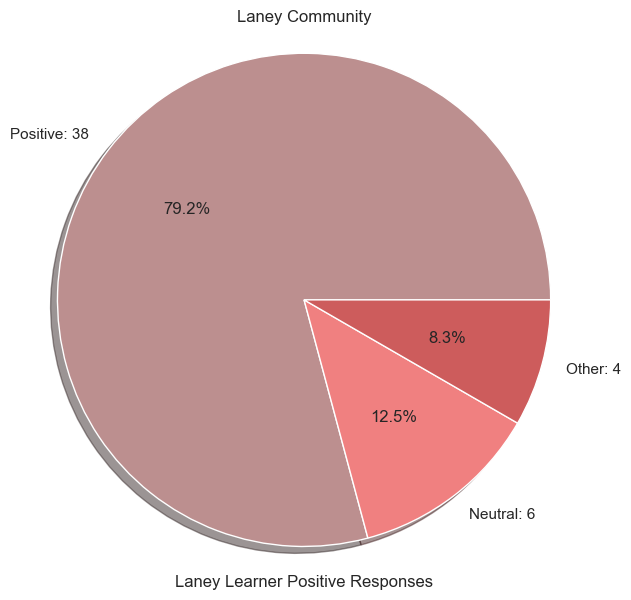

In [35]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(laney_totals["pos"]), 'Neutral: {}'.format(laney_totals["pos_with_n"] - laney_totals["pos"]), 'Other: {}'.format(laney_totals["valid"] - laney_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (laney_totals["pos"] / laney_totals["valid"]) * 100
per2 = ((laney_totals["pos_with_n"] - laney_totals["pos"]) / laney_totals["valid"]) * 100
per3 = 100 - per - per2

size_of_groups = [per, per2, per3]

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["rosybrown", "lightcoral", "indianred"], labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("Laney Learner Positive Responses")
plt.title("Laney Community")
# plt.savefig('images/laney_cargoals_pie.png')
plt.show()

<b>Overall, there were 48 responses given from all learners. 44 (91.7%) were positive including neutral responses and 38 (79.2%) were positive not including neutral responses.</b>

# I was able to achieve one of my goals in this program.

In [36]:
get_responses(laney1, "Goals_1")

{'valid': 12, 'di': 1, 'sd': 0, 'n': 0, 'sa': 4, 'ag': 7}

<img src="images/laney_goals_table.png" height=100% width=100%>

# I know about different positions and career opportunities in technology.

In [37]:
get_responses(laney1, "Career Opportunities_1")

{'valid': 12, 'di': 1, 'sd': 0, 'n': 2, 'sa': 3, 'ag': 6}

<img src="images/laney_car1_table.png" height=100% width=100%>

# I know what steps I need to take in order to pursue a career in technology.

In [38]:
get_responses(laney1, "Career Opportunities_2")

{'valid': 12, 'di': 1, 'sd': 0, 'n': 2, 'sa': 3, 'ag': 6}

<img src="images/laney_car2_table.png" height=100% width=100%>

# I know what degree and/or certificate I want to get at Laney Community College.

In [39]:
get_responses(laney1, "Career Opportunities_3")

{'valid': 12, 'di': 1, 'sd': 0, 'n': 2, 'sa': 2, 'ag': 7}

<img src="images/laney_car3_table.png" height=100% width=100%>

<hr style="border:2px solid black">
    
<b>Next we will be examining the learners responses to our inquiries about their intersectional tech identities</b>, or how much they feel they belong in the tech space and have access to resources to be successful. These questions are marked as the <b>Gee_1, Gee_2, Gee_3, McAlpine_1, McAlpine_2, McAlpine_3, McAlpine_4,</b> and <b>McAlpine_5</b> columns within the dataframe. Learners had five choices to choose from as their response to these questions: <b>Strongly Disagree, Somewhat Disagree, Somewhat Disagree, Strongly Agree</b>, and <b>Unsure or undecided.</b>

<b>It is important to note that this section was not broken into subsections like Communication about Technology and Hth Affective. As such, the overall pie chart visual from before (output 7) still represents this group. No new pie chart will follow.</b>

<img src="images/laney_gee.png" height=100% width=100%>
<img src="images/laney_mca.png" height=100% width=100%>
    
# I am the the type of person that will be successful in tech.

In [40]:
get_responses(laney1, "Gee_1")

{'valid': 12, 'di': 0, 'sd': 0, 'n': 1, 'sa': 2, 'ag': 9}

<img src="images/laney_id1_table.png" height=100% width=100%>
    
# Hack the Hood helped me see myself as a technical person.

In [41]:
get_responses(laney1, "Gee_2")

{'valid': 12, 'di': 0, 'sd': 0, 'n': 1, 'sa': 1, 'ag': 10}

<img src="images/laney_id2_table.png" height=100% width=100%>
    
# My classmates are people I want to work with in the future.

In [42]:
get_responses(laney1, "Gee_3")

{'valid': 12, 'di': 0, 'sd': 0, 'n': 2, 'sa': 1, 'ag': 9}

<img src="images/laney_id3_table.png" height=100% width=100%>
    
# I was able to contribute and help in my class experience.

In [43]:
get_responses(laney1, "McAlpine_1")

{'valid': 12, 'di': 0, 'sd': 0, 'n': 1, 'sa': 3, 'ag': 8}

<img src="images/laney_id4_table.png" height=100% width=100%>
    
# I figured out how to get help or fix my coding challenges.

In [44]:
get_responses(laney1, "McAlpine_2")

{'valid': 12, 'di': 0, 'sd': 0, 'n': 2, 'sa': 2, 'ag': 8}

<img src="images/laney_id5_table.png" height=100% width=100%>
    
# I found or continued a new hobby through this program.

In [45]:
get_responses(laney1, "McAlpine_3")

{'valid': 12, 'di': 0, 'sd': 0, 'n': 1, 'sa': 3, 'ag': 8}

<img src="images/laney_id6_table.png" height=100% width=100%>
    
# I received resources to help me in my future.

In [46]:
get_responses(laney1, "McAlpine_4")

{'valid': 12, 'di': 0, 'sd': 0, 'n': 1, 'sa': 4, 'ag': 7}

<img src="images/laney_id7_table.png" height=100% width=100%>
    
# Hack the Hood provided enough resources to help me be successful in this program.

In [47]:
get_responses(laney1, "McAlpine_5")

{'valid': 12, 'di': 0, 'sd': 0, 'n': 1, 'sa': 2, 'ag': 9}

<img src="images/laney_id8_table.png" height=100% width=100%>